ALP Data Mining

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

Perform data preparations to clean data

Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)

Cluster the data using K-Means, Hierarchical Clustering

Create a prediction model using any classification algorithm and compare the results

Data Preparations

In [20]:
student_data = pd.read_csv('C:/School/Student_Prediction/data.csv', sep=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [21]:
student_data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [22]:
student_data.duplicated().value_counts()

False    4424
dtype: int64

In [23]:
student_data.drop(["Application mode","Application order","Nacionality","Mother's qualification", "Father's qualification","Unemployment rate","Inflation rate", "GDP"], axis=1, inplace=True)
student_data.head()

,Marital status,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,171,1,1,122.0,5,9,127.3,1,0,...,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,9254,1,1,160.0,3,3,142.5,1,0,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,9070,1,1,122.0,9,9,124.8,1,0,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,9773,1,1,122.0,5,3,119.6,1,0,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,8014,0,1,100.0,9,9,141.5,0,0,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


EDA

In [24]:
categorical_variables = ['Marital status', 'Course', "Father's occupation",
                         "Mother's occupation", 'Educational special needs',
                         'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
                         'International', 'Displaced', 'Daytime/evening attendance\t'
                        ]

In [25]:
numeric_variables = ['Previous qualification',
 'Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']


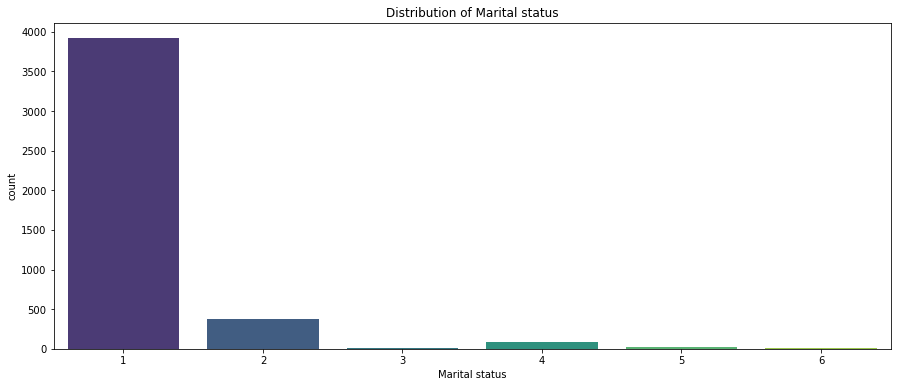

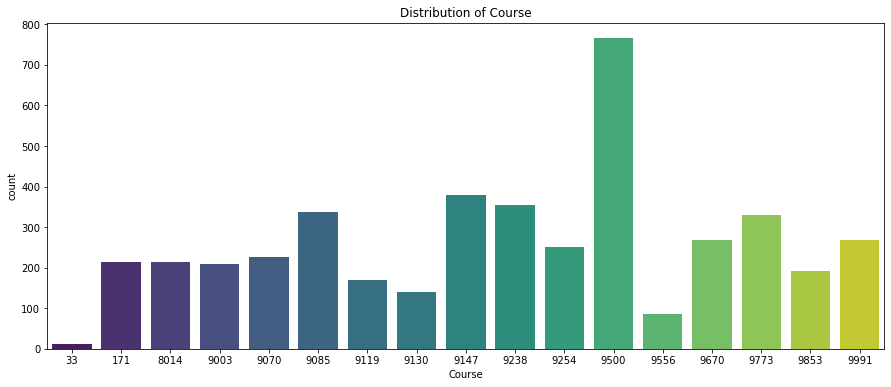

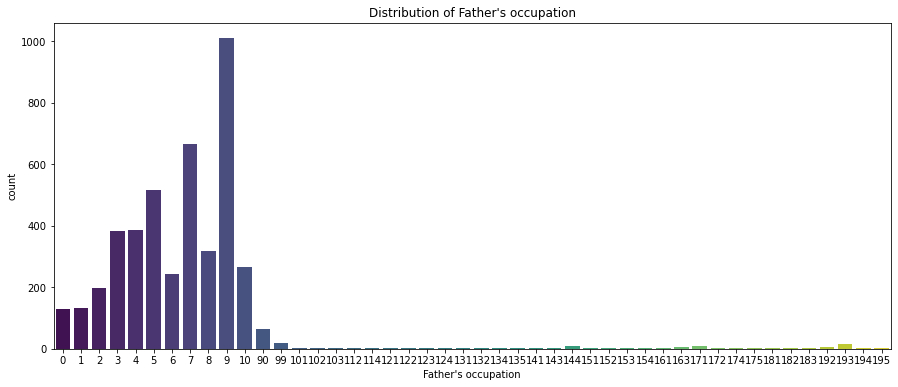

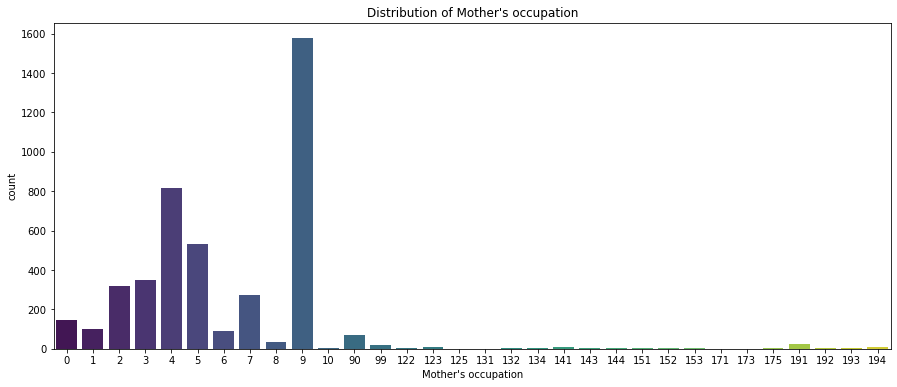

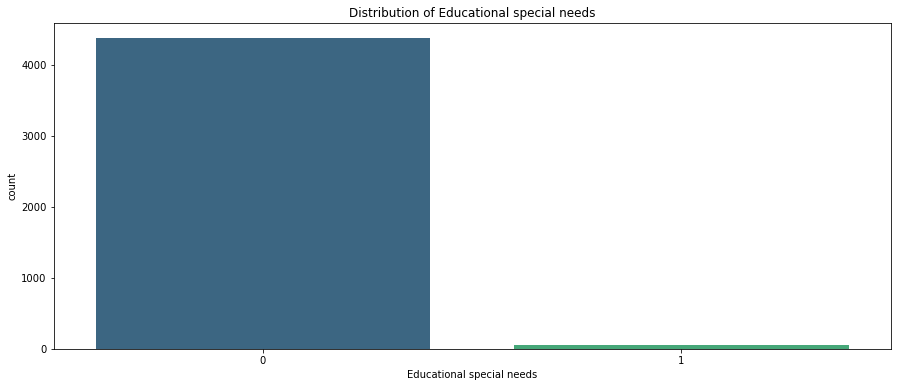

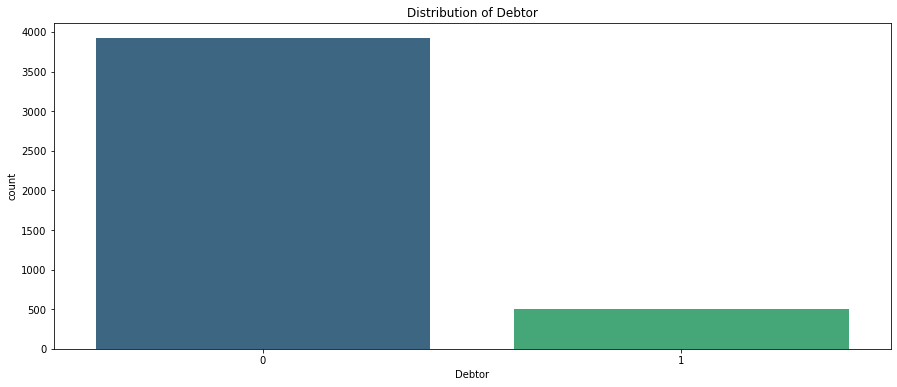

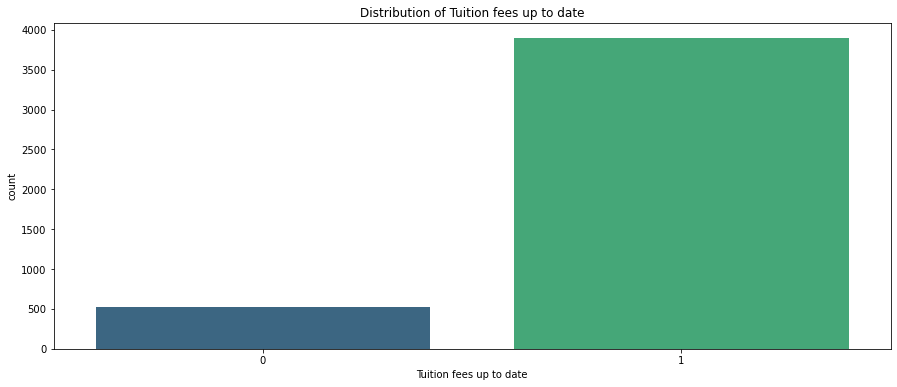

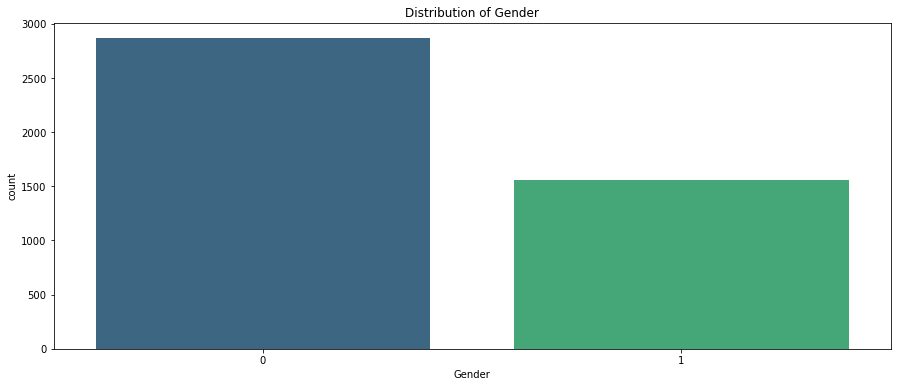

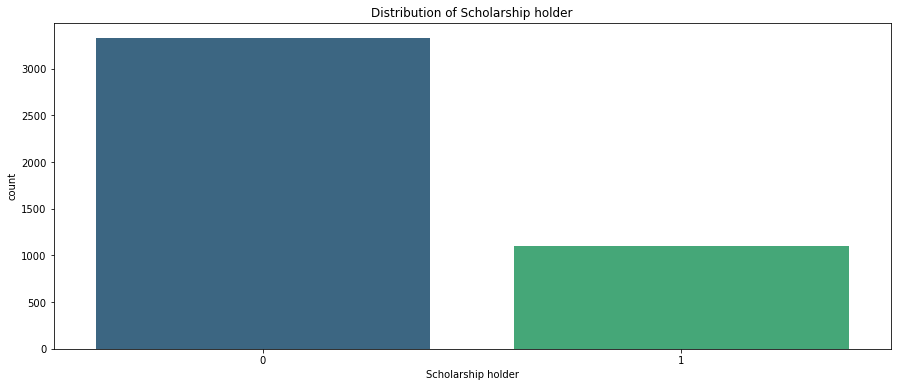

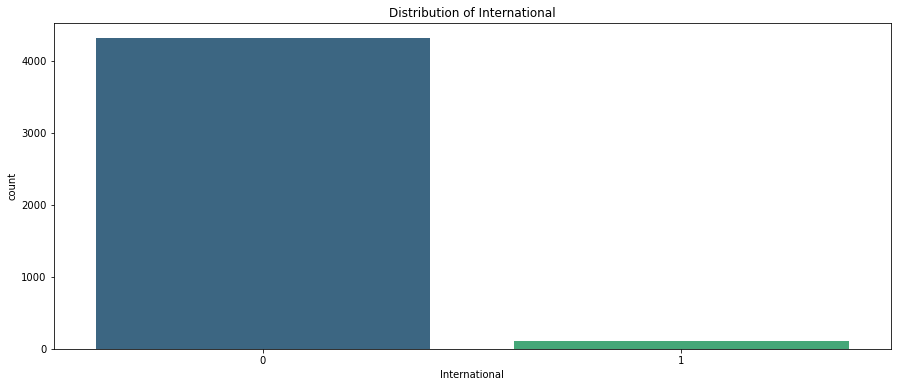

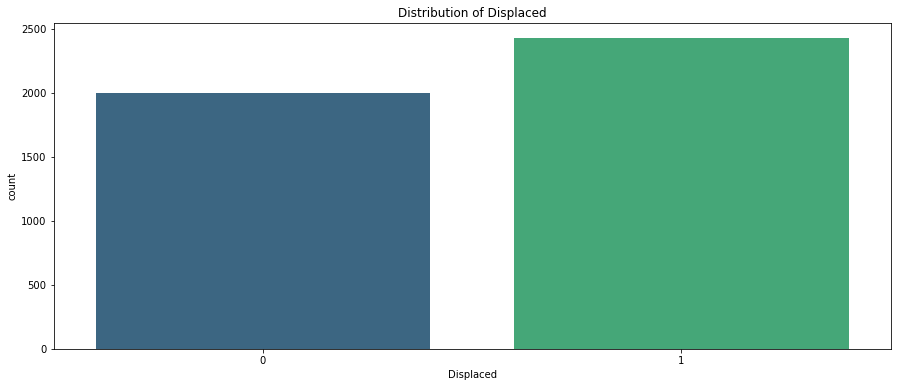

c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


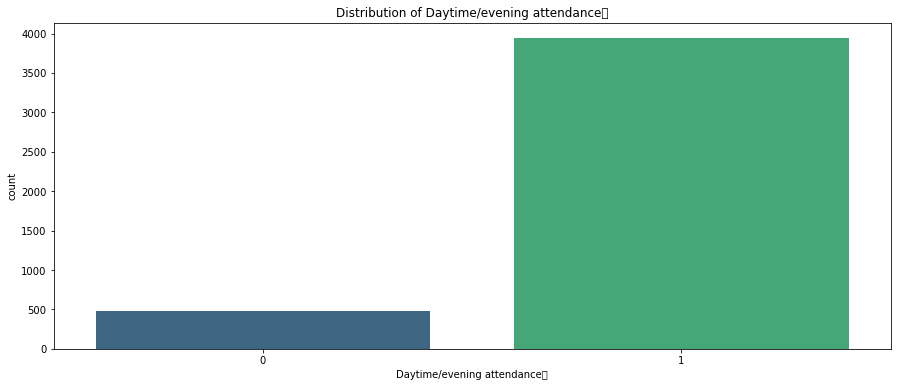

In [26]:
for cat_var in categorical_variables:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=cat_var, data=student_data, palette='viridis')
    plt.title(f'Distribution of {cat_var}')

    plt.show()

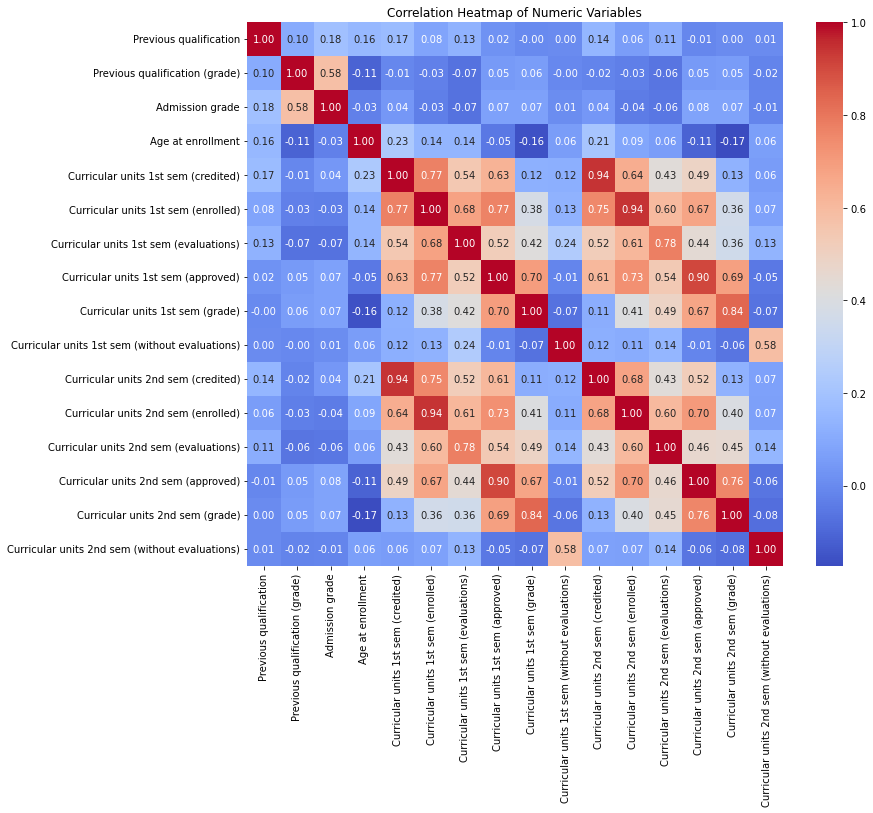

In [27]:
numeric_df = student_data[numeric_variables]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


In [29]:
scaler = StandardScaler()
scale_data_student = scaler.fit_transform(numeric_df)
scale_data_student = pd.DataFrame(scale_data_student, columns=numeric_df.columns)
scale_data_student.head()


,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,-0.35023,-0.804841,0.022229,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441
1,-0.35023,2.076819,1.071926,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441
2,-0.35023,-0.804841,-0.150419,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441
3,-0.35023,-0.804841,-0.509526,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,0.575611,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441
4,-0.35023,-2.473171,1.002867,2.864765,-0.300813,-0.109105,0.167746,0.094832,0.349468,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441


Kmeans

In [30]:
df_kmeans = numeric_df.copy()
df_kmeans_scaled = scale_data_student.copy()

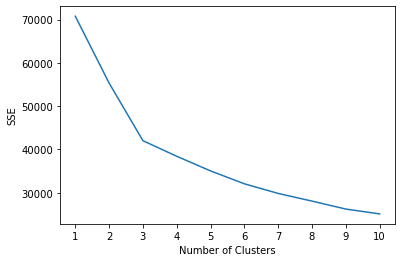

In [31]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42}

# check the inertia for each K
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(df_kmeans_scaled)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  3


In [33]:
kmeans = KMeans(init="random", n_clusters=3, max_iter=300, random_state=42)
kmeans.fit_predict(df_kmeans_scaled)

array([0, 1, 0, ..., 1, 1, 1])

In [34]:
kmeans = KMeans(n_clusters=3, **kmeans_params)
df_kmeans['Cluster'] = kmeans.fit_predict(df_kmeans_scaled)

In [42]:
features_for_clustering = ['Previous qualification',
 'Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']
cluster_means = df_kmeans.groupby("Cluster")[features_for_clustering].mean()
cluster_counts = df_kmeans['Cluster'].value_counts().sort_index()

result_df = pd.concat([cluster_means, cluster_counts.rename('Count')], axis=1)
result_df


,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Count
0,4.619904,132.736211,126.747242,25.852518,0.022782,4.333333,4.394484,0.304556,1.705527,0.239808,0.009592,4.399281,3.597122,0.076739,0.535871,0.292566,834
1,4.152410,132.627259,126.819187,22.178012,0.223193,6.182229,8.593373,5.238554,12.720865,0.087651,0.162651,6.255723,8.650301,5.073193,12.466438,0.103012,3320
2,9.677778,132.062222,129.645556,28.640741,8.818519,13.340741,16.740741,11.762963,12.664129,0.437037,6.848148,11.603704,14.640741,10.062963,12.677559,0.292593,270


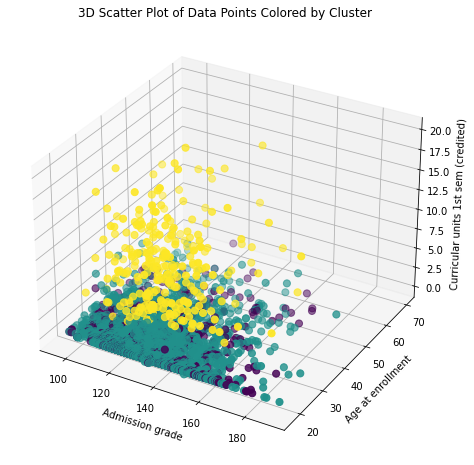

In [35]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_kmeans['Admission grade'], df_kmeans['Age at enrollment'], df_kmeans['Curricular units 1st sem (credited)'], c=df_kmeans['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Admission grade')
ax.set_ylabel('Age at enrollment')
ax.set_zlabel('Curricular units 1st sem (credited)')

plt.title('3D Scatter Plot of Data Points Colored by Cluster')
plt.show()


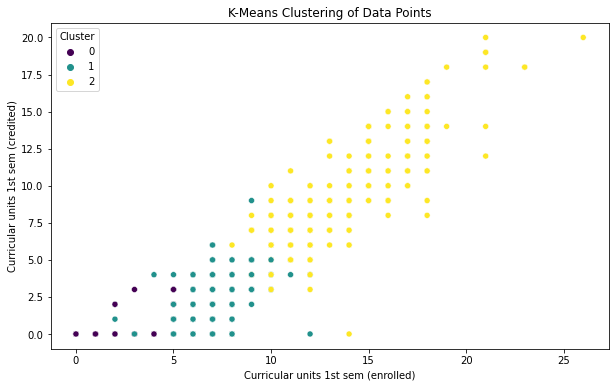

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Curricular units 1st sem (enrolled)', y='Curricular units 1st sem (credited)', hue='Cluster', data=df_kmeans, palette='viridis', legend='full')
plt.title('K-Means Clustering of Data Points')
plt.xlabel('Curricular units 1st sem (enrolled)')
plt.ylabel('Curricular units 1st sem (credited)')
plt.show()


Hierarchical Clustering

In [37]:
df_hie = numeric_df.copy()
df_hie_scaled = scale_data_student.copy()

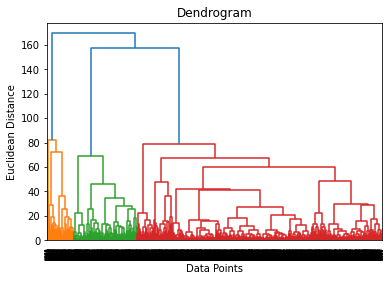

In [38]:
dendrogram = sch.dendrogram(sch.linkage(df_hie_scaled, method='ward', metric='euclidean'))

# Menampilkan dendrogram
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [56]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
df_hie['Cluster'] = agg_cluster.fit(df_hie_scaled)


In [59]:
clustering_result = df_hie.groupby('Cluster').mean()
clustering_result

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
Cluster,,,,,,,,,,,,,,,,
AgglomerativeClustering(n_clusters=3),4.577758,132.613314,126.978119,23.265145,0.709991,6.27057,8.299051,4.7066,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316


Create a prediction model using any classification algorithm and compare the results

Logistic Regression

In [60]:
X = student_data.drop(columns='Target')
Y = student_data['Target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [61]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [62]:
logreg = LogisticRegression()
y_pred = logreg.fit(scaled_X_train, Y_train)
y_pred

LogisticRegression()

In [63]:
y_pred = logreg.predict(scaled_X_test)
print(y_pred)
print(confusion_matrix(Y_test,y_pred)) 
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

['Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Dropout' 'Dropout' 'Dropout' 'Dropout'
 'Dropout' 'Graduate' 'Enrolled' 'Dropout' 'Graduate' 'Enrolled' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Dropout'
 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout'
 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Enrolled'
 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Enrolled'
 'Dropout' 'Graduate' 'Enrolled' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Enrolled' 'Enrolled' 'Graduate' 'Enrolled' 'Dropout'
 'Graduate' 'Enrolled' 'Graduate' 'Graduate' 'Dropout' 'Dropout'
 'Graduate' 'Enrolled' 'Enrolled' 'Dropout' 'Graduate' 'Enrolled'
 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Enrolled' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Enrolled' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Dr

Naive Bayes

In [64]:
nb = GaussianNB()
nb = nb.fit(scaled_X_train, Y_train)

In [65]:
nb_pred = nb.predict(scaled_X_test)
print(nb_pred)
print(confusion_matrix(Y_test,nb_pred))
print("Accuracy score: ",(accuracy_score(Y_test,nb_pred)))

['Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Dropout'
 'Graduate' 'Dropout' 'Enrolled' 'Graduate' 'Dropout' 'Dropout' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Dropout' 'Enrolled' 'Enrolled' 'Graduate' 'Graduate' 'Dropout' 'Dropout'
 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Enrolled' 'Enrolled' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Enrolled'
 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Enrolled' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Enrolled' 'Graduate' 'Enrolled'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Dropout'
 'Graduate' 'Dropout' 'Graduate' 'G

K-Nearest Neighbour

In [68]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn = knn.fit(scaled_X_train, Y_train)


In [69]:
knn_pred = knn.predict(scaled_X_test)
print(knn_pred)
print(confusion_matrix(Y_test,knn_pred))
print("Accuracy score: ",(accuracy_score(Y_test,knn_pred)))

['Graduate' 'Dropout' 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Enrolled' 'Dropout' 'Dropout' 'Dropout'
 'Enrolled' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Enrolled'
 'Dropout' 'Graduate' 'Graduate' 'Enrolled' 'Dropout' 'Dropout' 'Enrolled'
 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Dropout' 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Dropout'
 'Enrolled' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Dropout'
 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Graduate' 'Enrolled' 'Graduate' 'Dropout' 'Dropout' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate'
 'Enrolled' 'Enrolled' 'Dropout' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Enrolled' 'Dropout' 'Enrolled' 'Graduate'
 'Dropout' 'Graduate' 'Dropout' 'Enrolled' 'Dropout' 'Graduate' 'Dropout'
 'Graduate' 'Dropout

Kesimpulan dari semua model yang dipakai nilai accuracy yang didapatkan memiliki nilai yang mirip - mirip namun nilai accuracy dari model Logistic Regression adalah yang paling baik, diikuti oleh KNN, dan terakhir naive bayes.

